In [31]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [32]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/BTC/BTC_DATA.csv")
btc_df=pd.read_csv(csv_path)

In [33]:
 # Set index as Date
btc_df = btc_df.set_index(pd.to_datetime(btc_df["Date"], infer_datetime_format=True))

# Display sample data
btc_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2013-10-01,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,2013-10-06,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,2013-10-07,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,2013-10-08,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,2013-10-09,124.04900,123.03300,124.78350,122.59266


In [34]:
#check for na
btc_df.isnull().values.any()

False

In [35]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [36]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [37]:
# Define the window size
window_size = 9

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(btc_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
  123.033   124.049  ]
 [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
  124.049   125.96116]
 [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
  125.96116 125.27966]] 

y sample values:
[[125.96116]
 [125.27966]
 [125.9275 ]]


In [38]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [39]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [40]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[2.38307842e-04]
  [2.66771807e-04]
  [0.00000000e+00]
  [0.00000000e+00]
  [1.08077145e-05]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[2.66771807e-04]
  [0.00000000e+00]
  [1.59552760e-04]
  [4.21331559e-05]
  [0.00000000e+00]
  [1.80252996e-05]
  [1.95808638e-05]
  [1.60699089e-05]
  [3.02448138e-05]]

 [[0.00000000e+00]
  [1.59552760e-04]
  [2.01679193e-04]
  [3.13257800e-05]
  [1.80252996e-05]
  [3.76058105e-05]
  [3.56504581e-05]
  [4.63142367e-05]
  [1.94654645e-05]]] 

X_test sample values:
[[[0.06106758]
  [0.06113126]
  [0.06147316]
  [0.06182555]
  [0.06095828]
  [0.06115588]
  [0.06098715]
  [0.06082216]
  [0.05994256]]

 [[0.06113126]
  [0.06147316]
  [0.06197523]
  [0.06098769]
  [0.06115588]
  [0.06100408]
  [0.06084055]
  [0.05995766]
  [0.05996776]]

 [[0.06147316]
  [0.06197523]
  [0.06113751]
  [0.06118529]
  [0.06100408]
  [0.06085748]
  [0.05997607]
  [0.05998287]
  [0.06160033]]]


In [41]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [42]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [43]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [44]:
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 9, 9)              396       
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 9, 9)              684       
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_5 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [45]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
23/23 [==============================] - 4s 8ms/step - loss: 0.0020
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 5/10
23/23 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 6/10
23/23 [==============================] - 0s 8ms/step - loss: 5.7301e-04
Epoch 7/10
23/23 [==============================] - 0s 8ms/step - loss: 3.4874e-04
Epoch 8/10
23/23 [==============================] - 0s 8ms/step - loss: 2.4379e-04
Epoch 9/10
23/23 [==============================] - 0s 14ms/step - loss: 3.1090e-04
Epoch 10/10
23/23 [==============================] - 0s 8ms/step - loss: 3.2697e-04


In [134]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [135]:
predicted.shape

(855, 1)

In [136]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [137]:
 # Create a DataFrame of Real and Predicted values
btc_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = btc_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
btc_eval.head()

,Actual,Predicted
Date,,
2019-03-26,3915.375320,4027.173340
2019-03-27,4018.590510,4026.826660
2019-03-28,4008.370872,4025.327637
2019-03-29,4080.260114,4020.498779
2019-03-30,4081.221605,4012.244629


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}, xlabel='Date'>

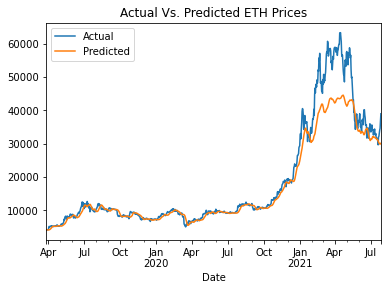

In [138]:
 # Plot the real vs predicted prices as a line chart
btc_eval.plot(title="Actual Vs. Predicted ETH Prices")

In [139]:
#seprate actual and pred
Pred= btc_eval['Actual']
act= btc_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

22843143.094656184
4779.450082871061
2336.500097640084


In [146]:
#create buy and sell signals 
#calculate profit and loss

#create 'profit/loss' column to track trade metrics
btc_eval['profit/loss'] = np.nan

#create column to hold buy and cell signals
btc_eval['signals'] = np.nan

#create buy and sell list containers
buy = []
sell = []

#create column that has next days price
btc_eval['next_day'] = btc_eval["Predicted"].shift(-1)

In [147]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in btc_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        btc_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        btc_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        btc_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        #btc_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        btc_eval.loc[index, "signals"] = "hold"


In [148]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in btc_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        btc_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        btc_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        btc_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        btc_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        btc_eval.loc[index, "signals"] = "hold"


In [149]:
btc_eval.dropna(inplace= True)

In [150]:
btc_eval.tail()

,Actual,Predicted,profit/loss,signals,next_day
Date,,,,,
2021-07-21,32014.436034,30442.689453,0.000000,buy,30224.376953
2021-07-22,32203.365638,30224.376953,0.000000,buy,30063.230469
2021-07-23,33117.751462,30063.230469,0.000000,buy,29845.333984
2021-07-24,34014.618359,29845.333984,0.000000,buy,29839.986328
2021-07-25,34574.670661,29839.986328,560.052302,sell,29918.623047


In [152]:
# calculate total profit/loss and percent return for 1000 total coins

# total amount of initial capital
initial_capital = 1000000

# set total amount of coins
coin_order = 1000

# calculate total profit/loss
total_profit_loss = round(btc_eval["profit/loss"].sum() * coin_order, 2)

# calculate return on investemnt 
roi = round((total_profit_loss / initial_capital) * 100, 2)

# display profit/loss and roi
print(
    f"The total profit/loss of the trading model is ${total_profit_loss}, "
    f"with the total return on investment being {roi}%"
)

The total profit/loss of the trading model is $1061116212.81, with the total return on investment being 106111.62%
